# Lab 1: Cartesian trajectory planning

## Matlab functions

- cartesian_planning.m: Complete simulation of the evolution of Cartesian trajectories and orientation using Robotic Toolbox with the ABB IRB120 manipulator
- [pr, qr]=qpinter(P1, P2, lambda): 
- P=generate_smooth_path(P0, P1, P2, tau, T, t)
- T=zyz2tr(a): converts the rwow vector a of ZYZ Euler angles to a 4x4 homogeneous transformation
- q=tr2q(T, m): convert a 4x4 homogeneous trasnformation to ZYZEuler angles representation
- q=tr2q(T, m): converts homogeneous matrix T to quaternion q
- T=q2tr(q): Convert quaternion q to 4x4 homogeneous matrix T
- q=qqmul(q1, q2): multiply q1 and q2 quaternions
- q2 = qinv(1): inverts quaternion q

## Quaternion interpolation

Define the quaternion interpolation function based on the Taylor method (pr, qr)=qpinter(P1, P2, lambda) that calculates the intermediate quaternion between $q_1$ (initial) and $q_2$ (final). 

The value $\lambda$ must satisfy $0 \le \lambda \le 1$, so that

- (p1, q1) = qpinter(P1, P2, 0) and 
- (p2, q2) = qpinter(P1, P2, 1)

```C
    function [pr,qr]=qpinter(Pa,Pb,lambda)
        % Interpolate the position (fórmula 2)
        pr = (Pa(1:3, 4)+(Pb(1:3,4)-Pa(1:3,4)).*lambda);

        % Interpolate the orientation 
        Qa = tr2q(Pa);
        Qb = tr2q(Pb);
        Qc = qqmul(qinv(Qa), Qb);
        w = Qc(1);
        v = Qc(2:4);
        theta = 2*acos(w);
        n = v ./ sin(theta/2);
        lambda_theta = lambda * theta;
        wrot = cos(lambda_theta / 2);
        vrot = n .* sin(lambda_theta / 2);
        qrot = [wrot vrot];
        qr =  qqmul(Qa, qrot);    
    end
```

## Smooth trajectory generation

Create a MATLAB function in the format *P=generate_smooth_path(P0, P2, P2, tau, T, t)* that calculates 
the trasnformation $P$ corresponding to the movement from $P_0$ to $P_2$ via $P_1$ somoothed by the Taylor method

The parameters $\tau$ and $T$ correspond respectively to the trasnsition interval and total time used to traverse the path as shown in Figure 1, 
and $T$ indicates the time at which the location of calculated path $P$ is reached

```C
function [P, Q]=generate_smooth_path(P0, P1, P2, tau, T, t)
    % Function that calculates the transformation 
    % (P - position, and Q - orientation) from P1 to P3 
    % smoothing in P2 with Taylor method (quaternions)

    if (t<-T || t>T)
        % Out of allowed range
        disp('Parameter t out of range');

    elseif (t<=-tau) % First segment (lineal)
        [P, Q] = qpinter(P0, P1, (t+T)/T);
    
    elseif (t>=tau) % Third segment (lineal)
        [P, Q] = qpinter(P1, P2, t/T);
    
    else % Second segment (smoothing)

        % time factor
        tfactori = (tau-t)^2/(4 * tau * T);
        tfactord = (tau+t)^2/(4 * tau * T);
        
        % Position interpolation
        p0 = P0(1:3, 4);
        p1 = P1(1:3, 4);
        p2 = P2(1:3, 4);
        DeltaP0 = p1 - p0;
        DeltaP2 = p1 - p2;
        P = p1 - tfactori .* DeltaP0 - tfactord .* DeltaP2;
        %P = p1 + tfactor .* DeltaP1 - tfactor .* DeltaP2;
        
        % Orientation interpolation
        Q0 = tr2q(P0);
        Q1 = tr2q(P1);
        Q2 = tr2q(P2);
        Q01 = qqmul(qinv(Q0), Q1);
        Q12 = qqmul(qinv(Q1), Q2);
        w01 = Q01(1);
        w12 = Q12(1);
        v01 = Q01(2:4);
        v12 = Q12(2:4);
        theta01 = 2 * acos(w01);
        theta12 = 2 * acos(w12);
        n01 = v01 ./ sin(theta01/2);
        n12 = v12 ./ sin(theta12/2);
        thetak1 = -tfactori * theta01;
        thetak2 = +tfactord * theta12;
        Qk1 = [cos(thetak1/2), n01 .* sin(thetak1/2)];
        Qk2 = [cos(thetak2/2), n12 .* sin(thetak2/2)];
        Q = qqmul(Q1, qqmul(Qk1, Qk2));
        
    end
end
```

## Graphical representation

![Trayectoria 3D](fig11_trayectoria.png)

![Trayectoria Posición](fig12_smooth_path.jpg)

![Trayectoria Orientación](fig13_orientation_trajectories.jpg)

### Trayectoria con posiciones iniciales del enunciado

(https://img.youtube.com/vi/49JpJ9kNpqM/0.jpg)](https://youtu.be/49JpJ9kNpqM)
[![https://youtu.be/49JpJ9kNpqM](https://img.youtube.com/vi/49JpJ9kNpqM/0.jpg)](https://youtu.be/49JpJ9kNpqM)

Se observa un cambio brusco de orientación cerca del punto intermedio; esto ocurre porque el mismo giro puede representarse con dos cuaternios distintos, uno positivo y otro negativo. Si no se tiene en cuenta en el código, el algortimo puede elegir el giro más largo en lugar del corto para cambiar la orientación cuando la velocidad angular se hace igual a cero.

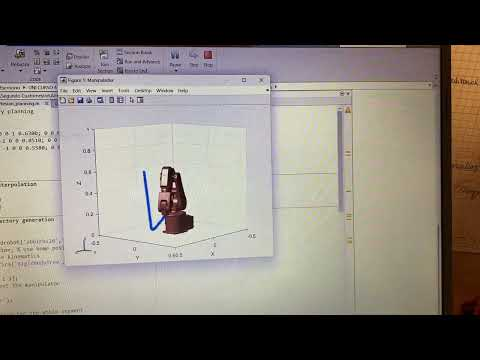

In [3]:
from IPython.display import YouTubeVideo

# Embedding the "Never Gonna Give You Up" music video
YouTubeVideo('49JpJ9kNpqM')

### Trayectoria con posiciones iniciales distintas al enunciado

Se observa el mismo comportamiento que en el caso anterior: en el punto intermedio el efector final cambia bruscamente de posición cuando la velocidad angular se iguala a cero.

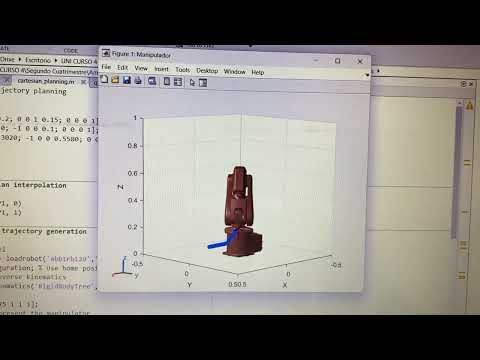

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('BhRcVxbt7wU')